This notebook applies machine learning modeling techniques. The following have been analyzed:

1. Clustering methods have been applied to predict country labels based on the other variables 
2. Classification techniques have been applied to predict if a beer will have a rating above or below 4

## Import Python Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.tree import DecisionTreeClassifier

## Import Data

In [2]:
df = pd.read_csv('FinalData.csv')

In [3]:
df.head()

,Unnamed: 0,Name,ABV,AverageRating,RatingCount,BeerStyle,BreweryType,City,State,Country,has_twitter,has_facebook,SocialMedia
0,0,Närke Kaggen Stormaktsporter,9.500000,4.489771,557.0,Imperial Stout,Microbrewery,Örebro,NaN,Sweden,0,0,0
1,1,Westvleteren 12 (XII),10.200000,4.426578,3332.0,Abt/Quadrupel,Microbrewery,Westvleteren,NaN,Belgium,0,0,0
2,2,Schramm’s The Heart of Darkness,14.000000,4.423655,77.0,Mead,Meadery,Ferndale,Michigan,United States,1,1,1
3,3,B. Nektar Ken Schramm Signature Series - The H...,14.000000,4.421873,50.0,Mead,Meadery,Ferndale,Michigan,United States,1,1,1
4,4,Cigar City Pilot Series Dragonfruit Passion Fr...,3.979168,4.420719,46.0,Berliner Weisse,Microbrewery,Tampa,Florida,United States,1,1,1


In [4]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [5]:
#Get beers from the top 15 countries
total_beers = df.groupby('Country').Country.count()
total_beers1 = dict(total_beers.sort_values(ascending=False).head(15))
countries = list(total_beers1.keys())
top_15 = pd.DataFrame()
for c in countries:
    top_15 = top_15.append(df[df.Country == c])


In [6]:
data = top_15

In [7]:
data = data.drop(['BeerStyle','BreweryType','City','State','Name','has_twitter','has_facebook'], axis=1)

## K-Means Clustering

In [8]:
f1 = data.ABV.values
f2 = data.AverageRating.values
f3 = data.RatingCount.values
f4 = data.SocialMedia.values
X = np.array(list(zip(f1,f2,f3,f4)))

In [9]:
model = KMeans(n_clusters=15)

In [10]:
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=15, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [11]:
labels = model.predict(X)

In [12]:
abv = X[:,0]
avgrating = X[:,1]
ratcount = X[:,2]

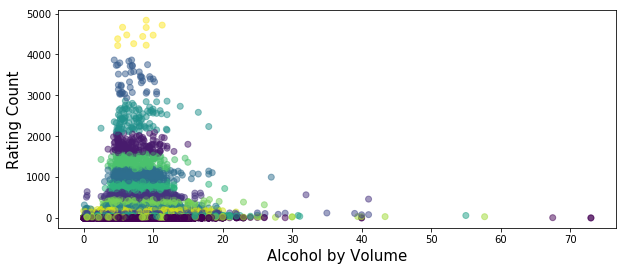

In [13]:
plt.figure(figsize=(10,4))
plt.scatter(abv,ratcount,c=labels,alpha=0.5)
plt.xlabel('Alcohol by Volume', size=15)
plt.ylabel('Rating Count',size=15)
plt.show()

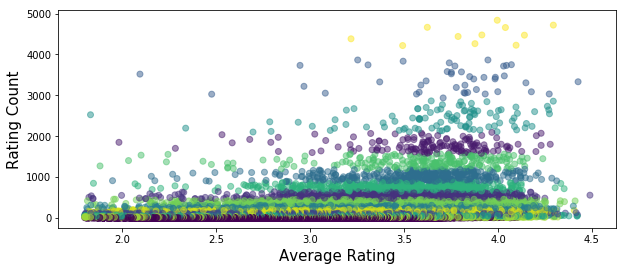

In [14]:
plt.figure(figsize=(10,4))
plt.scatter(avgrating,ratcount,c=labels,alpha=0.5)
plt.xlabel('Average Rating', size=15)
plt.ylabel('Rating Count',size=15)
plt.show()

In [15]:
print (model.inertia_)

34463073.7892


The inertia is too high, which indicates that the labels are spread wide apart. We will do an inertia plot with different clusters.

In [16]:
df_model = pd.DataFrame({'labels':labels,'country':data.Country})

In [17]:
ct_model = pd.crosstab(df_model['labels'],df_model['country'])

In [18]:
ct_model

country,Belgium,Canada,Czech Republic,Denmark,England,Finland,France,Germany,Netherlands,Norway,Poland,Scotland,Spain,Sweden,United States
labels,,,,,,,,,,,,,,,
0,1954,9455,1965,3786,14296,1927,1991,7082,2988,2245,2646,1990,2002,3126,57643
1,24,4,0,1,5,0,1,12,3,1,0,4,0,0,88
2,105,22,4,33,46,0,6,41,20,12,10,20,3,5,476
3,454,391,124,705,710,81,77,482,337,148,290,165,82,289,3274
4,11,1,1,0,4,0,0,5,1,0,0,0,0,0,19
5,58,8,1,12,18,0,0,25,8,5,1,10,2,1,208
6,224,58,22,157,150,6,22,115,57,27,42,73,16,38,1208
7,12,3,1,1,7,0,0,7,1,0,0,1,0,0,64
8,787,1107,211,1541,1969,307,244,1229,773,400,652,332,204,723,6415


In [19]:
#run K-means with different number of clusters to get the inertia plot
#ks = [15,25,35,45,55,65,75]
#inertias =[]

#for k in ks:
 #   model = KMeans(n_clusters=k)
 #   model.fit(X)
 #   inertias.append(model.inertia_)

In [20]:
#plt.plot(ks,inertias,'-o')
#plt.xlabel('number of clusters, k', size=10)
#plt.ylabel('inertia',size=10)
#plt.title('K-means Inertia Plot', size =10)
#plt.xticks(ks)
#plt.show()

The inertias are still very high even for 45 clusters. 

In [21]:
model_45 = KMeans(n_clusters=45)

In [22]:
model_45.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=45, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [23]:
labels_45 = model_45.predict(X)

In [24]:
df_model = pd.DataFrame({'labels':labels_45,'country':data.Country})

In [25]:
ct_model = pd.crosstab(df_model['labels'],df_model['country'])

In [26]:
ct_model

country,Belgium,Canada,Czech Republic,Denmark,England,Finland,France,Germany,Netherlands,Norway,Poland,Scotland,Spain,Sweden,United States
labels,,,,,,,,,,,,,,,
0,735,2068,375,1524,3691,624,549,2400,931,652,729,464,427,882,11873
1,16,3,1,1,1,0,0,7,0,1,1,5,0,0,49
2,55,13,5,28,33,2,7,28,12,10,4,14,3,7,327
3,6,0,0,0,0,0,0,1,1,0,0,0,0,0,7
4,142,78,27,153,142,10,20,105,79,35,53,49,18,55,849
5,13,2,2,3,6,0,0,6,2,1,0,1,0,0,106
6,3,1,0,0,0,0,0,1,0,0,0,0,0,0,14
7,30,11,1,12,14,0,0,15,4,3,1,7,0,3,154
8,270,319,57,412,522,79,72,327,229,115,186,91,52,223,1910


## Hierachical Clustering - All Beers

We will apply hierachical clustering for the top 1000 beers since this clustering method is good only for a small data set.

In [27]:
#get the top 1000 beers from the data frame
top1000 = df[0:1000]

In [28]:
# drop the unwanted columns
top1000 = top1000.drop(['Name','City','State','has_twitter','has_facebook'],axis=1)

In [29]:
#get dummies for the BeerStyle and BreweryType categorical variables 
colreq = ['BeerStyle','BreweryType']
for col in colreq:
    dummies = pd.get_dummies(top1000[col],prefix=col)
    top1000 = top1000.join(dummies)

In [30]:
#drop the unwanted columns once more
top1000 = top1000.drop(['BeerStyle','BreweryType'],axis=1)

In [31]:
#get the arrays for clustering 
X1000 = top1000.drop('Country',axis=1).values
y1000 = top1000.Country.values

In [32]:
mergings = linkage(X1000,method='complete')

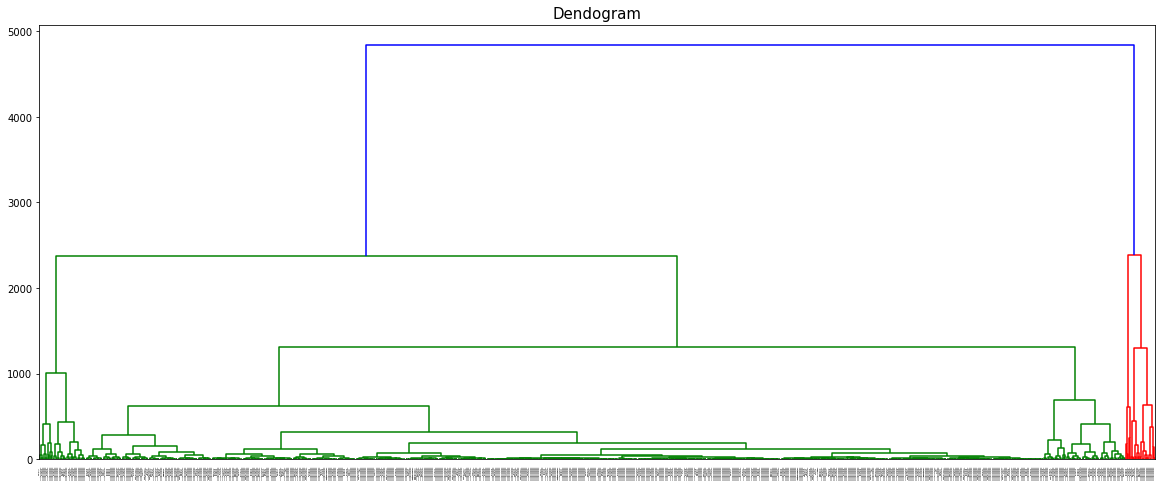

In [33]:
plt.figure(figsize=(20,8))
dendrogram(mergings,
           labels=y1000,
           leaf_rotation=90,
           leaf_font_size=2,)
plt.title('Dendogram', size=15)
plt.show()

In [34]:
labels1000 = fcluster(mergings,500,criterion='distance')

In [35]:
df1000 = pd.DataFrame({'labels': labels1000, 'country': y1000})

In [36]:
ct = pd.crosstab(df1000['labels'],df1000['country'])

In [37]:
ct

country,Australia,Belgium,Canada,Denmark,England,Estonia,Germany,Ireland,Italy,Netherlands,New Zealand,Norway,Poland,Romania,Scotland,Spain,Sweden,United States
labels,,,,,,,,,,,,,,,,,,
1,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9
2,0,5,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,21
3,0,14,4,6,3,0,0,0,0,5,0,4,2,0,2,0,4,69
4,2,53,21,28,19,2,1,1,5,24,0,8,6,1,8,4,19,544
5,0,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,14
6,0,11,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,37
7,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,0,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,4


Both the Kmeans and hierachical clustering perform poorly on predicting the country labels. We will treat the problem as a classification problem in the subsequent sections. 

## Decision Trees - All Beers

In [38]:
data = df

In [39]:
#drop unwanted columns
data = data.drop(['Name','City','State','has_twitter','has_facebook'],axis=1)

In [40]:
#create dummy variables for BeerStyle and BreweryType
cols_req = ['BeerStyle','BreweryType']
for col in cols_req:
    dummy = pd.get_dummies(data[col],prefix=col)
    data=data.join(dummy)

In [41]:
#drop the beerstyle and brewerytype columns
data = data.drop(['BeerStyle','BreweryType'],axis=1)

In [42]:
#get the X and y arrays for model
X = data.drop('Country',axis=1).values
y = data.Country.values

In [43]:
#split data into test train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
#instantiate a decision tree classifier and fit the model
clf = DecisionTreeClassifier(random_state=100)
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [45]:
y_pred = clf.predict(X_test)

In [46]:
print ("Accuracy is ", accuracy_score(y_test,y_pred)*100,'%')

Accuracy is  56.8757575758 %


In [47]:
#we will run the decision tree with the target variable (1 for average rating greater than 4 else 0)
data['Target'] = np.where(data.AverageRating < 4,0,1)

In [48]:
X = X = data.drop('Country',axis=1).values
y = data.Country.values
clf1 = DecisionTreeClassifier(criterion='gini',random_state=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf1.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [49]:
y_pred = clf1.predict(X_test)

In [50]:
print ("Accuracy is ", accuracy_score(y_test,y_pred)*100,'%')

Accuracy is  56.8727272727 %


We will apply the decision tree only beers from the top 10 conuntries (by count).

In [51]:
#get a dataframe with the beers from the top countries
countries_dat = dict(total_beers.sort_values(ascending=False).head(15))
countries = list(countries_dat.keys())
data_country = pd.DataFrame()
for c in countries:
    data_country = data_country.append(df[df.Country == c])

In [52]:
#drop unwanted columns
data_country = data_country.drop(['Name','City','State','has_twitter','has_facebook'],axis=1)

In [53]:
#get dummies
cols_req = ['BeerStyle','BreweryType']
for col in cols_req:
    dummy = pd.get_dummies(data_country[col],prefix=col)
    data_country=data_country.join(dummy)

In [54]:
data_country = data_country.drop(['BeerStyle','BreweryType'],axis=1)

In [55]:
X = data_country.drop('Country',axis=1).values
y = data_country.Country.values

In [56]:
clf2 = DecisionTreeClassifier(random_state=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf2.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [57]:
y_pred = clf2.predict(X_test)

In [58]:
print ("Accuracy is ", accuracy_score(y_test,y_pred)*100,'%')

Accuracy is  63.2211454361 %


The accuracy increases slightly for the beers from the top 10 countries. 

## KNN Classfier - US Beers

We will apply the KNN method on beers only from the United States. We will also create a new target variable - 0 for average rating less than 0 and 1 for average rating greater than 4.

In [59]:
df_us = df[df.Country == 'United States']

In [60]:
df_us.head()

,Name,ABV,AverageRating,RatingCount,BeerStyle,BreweryType,City,State,Country,has_twitter,has_facebook,SocialMedia
2,Schramm’s The Heart of Darkness,14.000000,4.423655,77.0,Mead,Meadery,Ferndale,Michigan,United States,1,1,1
3,B. Nektar Ken Schramm Signature Series - The H...,14.000000,4.421873,50.0,Mead,Meadery,Ferndale,Michigan,United States,1,1,1
4,Cigar City Pilot Series Dragonfruit Passion Fr...,3.979168,4.420719,46.0,Berliner Weisse,Microbrewery,Tampa,Florida,United States,1,1,1
6,Goose Island Bourbon County Stout - Rare 2010,13.000000,4.410718,417.0,Imperial Stout,Commercial Brewery,Chicago,Illinois,United States,1,1,1
7,Toppling Goliath Mornin’ Delight,12.000000,4.405847,186.0,Imperial Stout,Microbrewery,Decorah,Iowa,United States,1,1,1


In [61]:
df_us = df_us.drop(['Name','City','State','has_twitter','has_facebook','BreweryType','Country'],axis=1)

In [62]:
df_us['Target'] = np.where(df_us.AverageRating < 4,0,1)

In [63]:
df_us.head()

,ABV,AverageRating,RatingCount,BeerStyle,SocialMedia,Target
2,14.000000,4.423655,77.0,Mead,1,1
3,14.000000,4.421873,50.0,Mead,1,1
4,3.979168,4.420719,46.0,Berliner Weisse,1,1
6,13.000000,4.410718,417.0,Imperial Stout,1,1
7,12.000000,4.405847,186.0,Imperial Stout,1,1


In [64]:
#we can now drop the average rating column
df_us = df_us.drop(['AverageRating'],axis=1)

In [65]:
#we will create dummy variables for the beer_styles column 
style_dummies = pd.get_dummies(df_us.BeerStyle,prefix='style')

In [66]:
df_us = df_us.join(style_dummies)

In [67]:
df_us.head()

,ABV,RatingCount,BeerStyle,SocialMedia,Target,style_Abbey Dubbel,style_Abbey Tripel,style_Abt/Quadrupel,style_Altbier,style_Amber Ale,...,style_Sour/Wild Ale,style_Specialty Grain,style_Spice/Herb/Vegetable,style_Stout,style_Sweet Stout,style_Traditional Ale,style_Weizen Bock,style_Wheat Ale,style_Witbier,style_Zwickel/Keller/Landbier
2,14.000000,77.0,Mead,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14.000000,50.0,Mead,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.979168,46.0,Berliner Weisse,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,13.000000,417.0,Imperial Stout,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,12.000000,186.0,Imperial Stout,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
X = df_us.drop(['Target','BeerStyle'],axis=1).values

In [69]:
y = df_us.Target.values

In [70]:
#split the dataset into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

In [71]:
knn = KNeighborsClassifier(n_neighbors = 6)

In [72]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [73]:
print (knn.score(X_test,y_test))

0.993124031886


In [74]:
y_pred = knn.predict(X_test)

In [75]:
print(confusion_matrix(y_test, y_pred))

[[26287     6]
 [  176     0]]


In [76]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00     26293
          1       0.00      0.00      0.00       176

avg / total       0.99      0.99      0.99     26469



## Logisitic Regression - US Beers

We will apply logisitc regression to see how it compares to the KNN model when predicting if a beer rating is below or above 4. 

In [77]:
X = df_us.drop(['Target','BeerStyle'],axis=1).values
y = df_us.Target.values

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [79]:
logreg = LogisticRegression()

In [80]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [81]:
y_pred = logreg.predict(X_test)

In [82]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00     26289
          1       0.47      0.04      0.08       180

avg / total       0.99      0.99      0.99     26469



In [83]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]

In [84]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

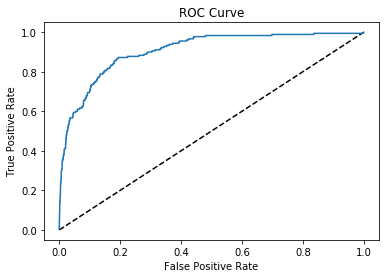

In [85]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [86]:
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.9065894691907472


The logistic regression model is good in prediciting if a beer will have a rating above or below 4 and is comparable to the KNN neighbors model. We will apply the logistic regression to the entire dataset.

## Logisitic Regression - All Beers

In [87]:
data = df

In [88]:
data.head()

,Name,ABV,AverageRating,RatingCount,BeerStyle,BreweryType,City,State,Country,has_twitter,has_facebook,SocialMedia
0,Närke Kaggen Stormaktsporter,9.500000,4.489771,557.0,Imperial Stout,Microbrewery,Örebro,NaN,Sweden,0,0,0
1,Westvleteren 12 (XII),10.200000,4.426578,3332.0,Abt/Quadrupel,Microbrewery,Westvleteren,NaN,Belgium,0,0,0
2,Schramm’s The Heart of Darkness,14.000000,4.423655,77.0,Mead,Meadery,Ferndale,Michigan,United States,1,1,1
3,B. Nektar Ken Schramm Signature Series - The H...,14.000000,4.421873,50.0,Mead,Meadery,Ferndale,Michigan,United States,1,1,1
4,Cigar City Pilot Series Dragonfruit Passion Fr...,3.979168,4.420719,46.0,Berliner Weisse,Microbrewery,Tampa,Florida,United States,1,1,1


In [89]:
data = data.drop(['Name','City','State','has_twitter','has_facebook'],axis=1)

In [90]:
data.head()

,ABV,AverageRating,RatingCount,BeerStyle,BreweryType,Country,SocialMedia
0,9.500000,4.489771,557.0,Imperial Stout,Microbrewery,Sweden,0
1,10.200000,4.426578,3332.0,Abt/Quadrupel,Microbrewery,Belgium,0
2,14.000000,4.423655,77.0,Mead,Meadery,United States,1
3,14.000000,4.421873,50.0,Mead,Meadery,United States,1
4,3.979168,4.420719,46.0,Berliner Weisse,Microbrewery,United States,1


In [91]:
#create target variable
data['Target'] = np.where(data.AverageRating < 4,0,1)

In [92]:
#drop the average rating
data = data.drop(['AverageRating'],axis=1)

In [93]:
data.head()

,ABV,RatingCount,BeerStyle,BreweryType,Country,SocialMedia,Target
0,9.500000,557.0,Imperial Stout,Microbrewery,Sweden,0,1
1,10.200000,3332.0,Abt/Quadrupel,Microbrewery,Belgium,0,1
2,14.000000,77.0,Mead,Meadery,United States,1,1
3,14.000000,50.0,Mead,Meadery,United States,1,1
4,3.979168,46.0,Berliner Weisse,Microbrewery,United States,1,1


In [94]:
#create dummy variables for the BeerStyle, BreweryType and Country Columns
cols = ['BeerStyle','BreweryType','Country']
for col in cols:
    dummies = pd.get_dummies(data[col],prefix=col)
    data = data.join(dummies)

In [95]:
#create X and Y arrays for model 
X = data.drop(['BeerStyle','BreweryType','Country','Target'],axis=1).values
y = data.Target.values

In [96]:
#create a train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [97]:
logreg = LogisticRegression()

In [98]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [99]:
y_pred = logreg.predict(X_test)

In [100]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     65744
          1       0.44      0.03      0.06       256

avg / total       0.99      1.00      0.99     66000



In [101]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]

In [102]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

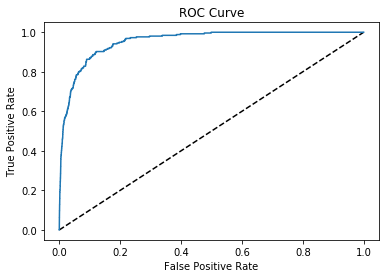

In [103]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [104]:
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.9551187655907762


The model performs well in predicting whether the beer will have a rating above or below 4. 

## NLP 

We will apply some NLP techniques on the beer description column of the original data set to see if we can derive some useful insights.

In [105]:
#import the original dataset
import pandas as pd
df_nlp_test = pd.read_csv('Ratebeer.csv')

In [106]:
df_nlp_test.head()

,Unnamed: 0,beer_id,beer_name,beer_description,beer_abv,beer_styleScore,beer_overallScore,beer_averageRating,beer_ratingCount,beer_styleName,brewery_name,brewery_type,brewery_street,brewery_city,brewery_state,brewery_country,brewery_continent,brewery_twitter,brewery_facebook
0,1,58057,Närke Kaggen Stormaktsporter,Imperial Stout brewed with heather honey and a...,9.5,100.0,100.0,4.489771,557,Imperial Stout,Närke Kulturbryggeri,Microbrewery,Beväringsgatan 2,Örebro,NaN,Sweden,NaN,NaN,NaN
1,2,4934,Westvleteren 12 (XII),Westvleteren has the smallest output of the Tr...,10.2,100.0,100.0,4.426578,3332,Abt/Quadrupel,Westvleteren Abdij St. Sixtus,Microbrewery,Donkerstraat 12,Westvleteren,NaN,Belgium,NaN,NaN,NaN
2,3,231441,Schramm’s The Heart of Darkness,The Heart of Darkness is our capstone mead. It...,14.0,100.0,100.0,4.423655,77,Mead,Schramm’s Mead,Meadery,327 West 9 Mile Road,Ferndale,Michigan,United States,North America,schrammsmead,https://facebook.com/SchrammsMeadery
3,4,106749,B. Nektar Ken Schramm Signature Series - The H...,Meadmaker Ken Schramm crafted the Heart of Dar...,14.0,100.0,100.0,4.421873,50,Mead,B. Nektar Meadery,Meadery,1511 Jarvis,Ferndale,Michigan,United States,North America,bnektar,https://facebook.com/b.nektar
4,5,140581,Cigar City Pilot Series Dragonfruit Passion Fr...,Editor’s Note: This is an archived entry for t...,0.0,100.0,100.0,4.420719,46,Berliner Weisse,Cigar City Brewing,Microbrewery,3924 W Spruce Street,Tampa,Florida,United States,North America,cigarcitybeer,https://facebook.com/cigarcitybeer


Since this is the original dataset we have missing values and other issues that we dealt with during the cleaning process. So we will extract only the beer_description column and combine that with the dataset that we have been using for the modeling.

In [107]:
#extract beer_description as a dataframe
df_beerdesc = pd.DataFrame(df_nlp_test.beer_description)

In [108]:
df_beerdesc.head()

,beer_description
0,Imperial Stout brewed with heather honey and a...
1,Westvleteren has the smallest output of the Tr...
2,The Heart of Darkness is our capstone mead. It...
3,Meadmaker Ken Schramm crafted the Heart of Dar...
4,Editor’s Note: This is an archived entry for t...


In [109]:
df.head()

,Name,ABV,AverageRating,RatingCount,BeerStyle,BreweryType,City,State,Country,has_twitter,has_facebook,SocialMedia
0,Närke Kaggen Stormaktsporter,9.500000,4.489771,557.0,Imperial Stout,Microbrewery,Örebro,NaN,Sweden,0,0,0
1,Westvleteren 12 (XII),10.200000,4.426578,3332.0,Abt/Quadrupel,Microbrewery,Westvleteren,NaN,Belgium,0,0,0
2,Schramm’s The Heart of Darkness,14.000000,4.423655,77.0,Mead,Meadery,Ferndale,Michigan,United States,1,1,1
3,B. Nektar Ken Schramm Signature Series - The H...,14.000000,4.421873,50.0,Mead,Meadery,Ferndale,Michigan,United States,1,1,1
4,Cigar City Pilot Series Dragonfruit Passion Fr...,3.979168,4.420719,46.0,Berliner Weisse,Microbrewery,Tampa,Florida,United States,1,1,1


In [110]:
#add the beerdescription column to main data set and create a new dataframe
df_nlp = df.join(df_beerdesc)

In [111]:
df_nlp.head()

,Name,ABV,AverageRating,RatingCount,BeerStyle,BreweryType,City,State,Country,has_twitter,has_facebook,SocialMedia,beer_description
0,Närke Kaggen Stormaktsporter,9.500000,4.489771,557.0,Imperial Stout,Microbrewery,Örebro,NaN,Sweden,0,0,0,Imperial Stout brewed with heather honey and a...
1,Westvleteren 12 (XII),10.200000,4.426578,3332.0,Abt/Quadrupel,Microbrewery,Westvleteren,NaN,Belgium,0,0,0,Westvleteren has the smallest output of the Tr...
2,Schramm’s The Heart of Darkness,14.000000,4.423655,77.0,Mead,Meadery,Ferndale,Michigan,United States,1,1,1,The Heart of Darkness is our capstone mead. It...
3,B. Nektar Ken Schramm Signature Series - The H...,14.000000,4.421873,50.0,Mead,Meadery,Ferndale,Michigan,United States,1,1,1,Meadmaker Ken Schramm crafted the Heart of Dar...
4,Cigar City Pilot Series Dragonfruit Passion Fr...,3.979168,4.420719,46.0,Berliner Weisse,Microbrewery,Tampa,Florida,United States,1,1,1,Editor’s Note: This is an archived entry for t...


We will count the number of rows with missing values. There is no easy way to impute the missing values for the description column. We will drop the missing values for further analysis.

In [112]:
df_nlp.beer_description.isnull().sum()

61640

There are 61,640 missing values. This is not too bad. We will drop these rows. 

In [113]:
df_nlp = df_nlp[pd.notnull(df_nlp.beer_description)]

In [114]:
len(df_nlp)

158360

We now have a dataframe with only the available values in the beer_description column. As a first step we will create a bag of words.

In [115]:
#rename the beer description column
df_nlp = df_nlp.rename(columns=({ 'beer_description' : 'Description'}))

In [125]:
from collections import Counter
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

In [126]:
#get all the sentences in the description column
text= []
for d in df_nlp.Description:
    text.append(sent_tokenize(d))

In [143]:
#create a list of words from the sentences 
words=[]
for i in range(len(text)):
    for j in range(len(text[i])):
        words.append(word_tokenize(text[i][j]))

In [149]:
#flatten the words list as a collection of tokens
tokens = []
for lst in words:
    for sublist in lst:
        tokens.append(sublist)

In [150]:
#convert tokens to lowercase
lower_tokens = [t.lower() for t in tokens]

In [151]:
#create bag of words
bow_simple = Counter(lower_tokens)

In [152]:
print(bow_simple.most_common(10))

[('.', 380727), (',', 351049), ('>', 286373), ('<', 286329), ('the', 195923), ('and', 193527), ('a', 189598), ('of', 137017), ('with', 121063), ('is', 82164)]


We need to remove the stop words and keep only the words in the list. We will apply a couple of list comprehensions to achieve this. 

In [153]:
#get only words, no punctuations, symbols etc
alphas_only = [t for t in lower_tokens if t.isalpha()]

In [156]:
#remove all stop words
from nltk.corpus import stopwords
english_stops = set(stopwords.words('english'))
no_stops = [t for t in alphas_only if t not in english_stops]

We will apply a lemmatizer as part of the pre-processing to get the correct words

In [157]:
#import lemmatizer from NLTK
from nltk.stem import WordNetLemmatizer
word_lemmatizer = WordNetLemmatizer()
final_words = [word_lemmatizer.lemmatize(t) for t in no_stops]

Now we will create a bag of words 

In [158]:
bow = Counter(final_words)

In [160]:
print ('The most common tokens:')
print(bow.most_common(20))

The most common tokens:
[('beer', 72126), ('hop', 67782), ('ale', 55013), ('malt', 47751), ('brewed', 34942), ('de', 24122), ('aroma', 22526), ('flavor', 22356), ('pale', 20919), ('ipa', 19163), ('en', 18777), ('barrel', 15802), ('note', 14749), ('finish', 14707), ('yeast', 14618), ('dark', 14156), ('og', 14132), ('cask', 13854), ('style', 13739), ('stout', 13513)]


Of course beer is the most common word in the set. We have some words like 'de' and 'og' in the list too. Since we have beers from all around the world, the description contains stop words from other languages as well. These will have to be removed as well. 

Some of the other most common words are 'aroma','dark','barrel','finish' and 'yeast'. These are words that are commonly used to describe beers and is expected to have an effect on the rating. 

We will apply NLP and logistic regression to predict the labels for the beers from the top 10 countries (by count). As a first step we will create a dataframe only with the necessary columns (numeric and beer description, target as country) and the countries in the country column.

In [162]:
data = df_nlp.drop(['Name','BeerStyle','BreweryType','City','State','has_twitter','has_facebook'],axis=1)

In [163]:
data.head()

,ABV,AverageRating,RatingCount,Country,SocialMedia,Description
0,9.500000,4.489771,557.0,Sweden,0,Imperial Stout brewed with heather honey and a...
1,10.200000,4.426578,3332.0,Belgium,0,Westvleteren has the smallest output of the Tr...
2,14.000000,4.423655,77.0,United States,1,The Heart of Darkness is our capstone mead. It...
3,14.000000,4.421873,50.0,United States,1,Meadmaker Ken Schramm crafted the Heart of Dar...
4,3.979168,4.420719,46.0,United States,1,Editor’s Note: This is an archived entry for t...


We will get only the top 10 countries based on the total number of beers from each country.

In [164]:
total_beers = data.groupby('Country').Country.count()
total_beers1 = dict(total_beers.sort_values(ascending=False).head(10))
countries = list(total_beers1.keys())
data_10 = pd.DataFrame()
for c in countries:
    data_10 = data_10.append(data[data.Country == c])

For the first part of the analysis we will use only the Description column to predict the country labels (i.e 0 or 1 for all the countries using dummies). We will use logisitc regression and a OnevsRestClassifier (multilabel classifier).

In [173]:
#import packages 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier

In [169]:
#split the data into test and training sets
X_train, X_test, y_train, y_test = train_test_split(data_10.Description,pd.get_dummies(data_10.Country),random_state=42)

In [174]:
#iniate a pipeline object
pl = Pipeline([
        ('vec', CountVectorizer()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

In [175]:
#fit pipeline to training data
pl.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('vec', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1))])

In [176]:
#compute accuracy score
accuracy = pl.score(X_test,y_test)
print ("\nAccuracy on test data - only for beer description: ", accuracy)


Accuracy on test data - only for beer description:  0.770277390361


The model is predicts the country labels with a 77% accuracy based only on the description. We will combine the ABV and rating count with the beer description to predict the country labels.

Since we need to combine text and numeric data, we will use methods such as FunctionTransform and FeatureUnion and build pipelines for predciting the country labels.

In [179]:
# Import FunctionTransformer
from sklearn.preprocessing import FunctionTransformer

In [181]:
# get only text data
get_text_data = FunctionTransformer(lambda x: x['Description'], validate=False)

#get only numeric data
get_numeric_data = FunctionTransformer(lambda x: x[['ABV','RatingCount']],validate=False)

In [182]:
text_data = get_text_data.fit_transform(data_10)
numeric_data = get_numeric_data.fit_transform(data_10)

In [183]:
text_data.head()

2    The Heart of Darkness is our capstone mead. It...
3    Meadmaker Ken Schramm crafted the Heart of Dar...
4    Editor’s Note: This is an archived entry for t...
6    From Greg Hall: "BCS rare, I’m excited. Brewed...
7    A huge Imperial Stout with an explosive espres...
Name: Description, dtype: object

In [184]:
numeric_data.head()

,ABV,RatingCount
2,14.000000,77.0
3,14.000000,50.0
4,3.979168,46.0
6,13.000000,417.0
7,12.000000,186.0


In [185]:
# Import FeatureUnion
from sklearn.pipeline import FeatureUnion

In [202]:
# split data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(data_10[['ABV', 'RatingCount', 'Description']],pd.get_dummies(data_10['Country']),random_state=22)

In [195]:
# Create nested pipeline and feature union to combine the features 
join_features = FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data)   
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )

In [190]:
# Instantiate pipeline
pl = Pipeline([
        ('union', join_features),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

In [191]:
# Fit pipeline
pl.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('union', FeatureUnion(n_jobs=1,
       transformer_list=[('numeric_features', Pipeline(memory=None,
     steps=[('selector', FunctionTransformer(accept_sparse=False,
          func=<function <lambda> at 0x000002A4FE8BE0D0>, inv_kw_args=None,
          inverse_func=None, kw_args=None, pass_y=...=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1))])

In [192]:
# Compute accuracy score
accuracy = pl.score(X_test,y_test)
print ("\nAccuracy on test data - for beer description, RatingCount, ABV : ", accuracy)


Accuracy on test data - for beer description, RatingCount, ABV :  0.775577250891


The accuracy with the three features combined is 77.5%, an increase only by 0.5% compared to predicting only on beer description. We will try using an other classifier such as the RandomForestClassifer.

In [205]:
from sklearn.ensemble import RandomForestClassifier
pl1 = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )),
        ('clf', RandomForestClassifier(n_estimators=15))
    ])

In [206]:
pl1.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('union', FeatureUnion(n_jobs=1,
       transformer_list=[('numeric_features', Pipeline(memory=None,
     steps=[('selector', FunctionTransformer(accept_sparse=False,
          func=<function <lambda> at 0x000002A4FE8BE0D0>, inv_kw_args=None,
          inverse_func=None, kw_args=None, pass_y=...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [207]:
accuracy = pl1.score(X_test,y_test)
print ("\nAccuracy on test data - for beer description, RatingCount, ABV using RandomForestClassifier: ", accuracy)


Accuracy on test data - for beer description, RatingCount, ABV using RandomForestClassifier:  0.789183325585


The accuracy increases slightly for RandomForestClassifier model. The accuracy now for prediciting country labels is 78.9%. We will apply some other methods for tokenization and scaling to see if we can increase the accuracy.

In [209]:
# Create a token pattern for the countvectorizer.
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Import MaxAbsScaler
from sklearn.preprocessing import MaxAbsScaler

# Instantiate a pipleline
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                   ngram_range=(1,2))),
                ]))
             ]
        )),
        ('scale', MaxAbsScaler()),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

In [210]:
pl.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('union', FeatureUnion(n_jobs=1,
       transformer_list=[('numeric_features', Pipeline(memory=None,
     steps=[('selector', FunctionTransformer(accept_sparse=False,
          func=<function <lambda> at 0x000002A4FE8BE0D0>, inv_kw_args=None,
          inverse_func=None, kw_args=None, pass_y=...=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1))])

In [223]:
accuracy = pl.score(X_test,y_test)
print ("\nAccuracy on test data - for beer description, RatingCount, ABV ", accuracy)


Accuracy on test data - for beer description, RatingCount, ABV  0.706772044011


The above model used a token vectorizer, ngrams and scalers with Logisitc Regression to fit the model. The accuracy reduces to 70%. We will remove the scaler, tokenization, change ngram range and rerun the model.

In [219]:
# Instantiate a pipeline with the changes
pl1 = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer(ngram_range=(1,3))),
                ]))
             ]
      
        )),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

In [220]:
# fit the pipeline
pl1.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('union', FeatureUnion(n_jobs=1,
       transformer_list=[('numeric_features', Pipeline(memory=None,
     steps=[('selector', FunctionTransformer(accept_sparse=False,
          func=<function <lambda> at 0x000002A4FE8BE0D0>, inv_kw_args=None,
          inverse_func=None, kw_args=None, pass_y=...=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1))])

In [221]:
accuracy = pl1.score(X_test,y_test)
print ("\nAccuracy on test data - for beer description, RatingCount, ABV using ngrams: ", accuracy)


Accuracy on test data - for beer description, RatingCount, ABV using ngrams:  0.812118394545


The model accuracy increases to 81% for predicting country labels using ngrams.